## 4 Local Descent

In [1]:
# necessary libraries
using Plots
using ForwardDiff
using Printf
using LinearAlgebra


In [2]:
# trial function and gradient
#f_booth_0(x1, x2) = (x1 + 2*x2 -7)^2 + (2*x1 + x2 -5)^2
#f_booth((x1, x2)) = [(x1 + 2*x2 -7)^2 + (2*x1 + x2 -5)^2]

f_0(x1, x2) = x1^2 + x1*x2 + x2^2
f((x1, x2)) = [x1^2 + x1*x2 + x2^2]

function f_prime(a)
    return ForwardDiff.jacobian(f, a)[1,:]
end

x0 = [1.0, 2.0]
println(f(x0))
println(f_prime(x0))

[7.0]
[4.0, 5.0]


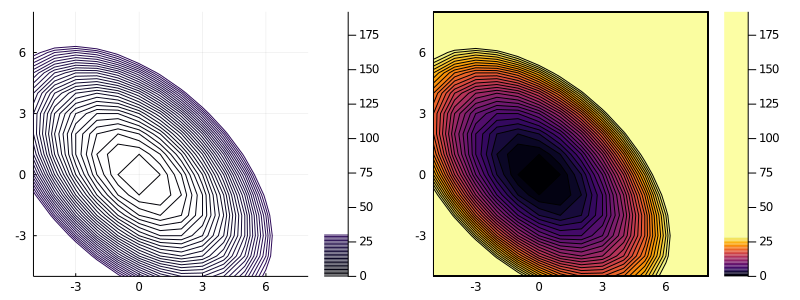

┌ Warning: GR: highest contour level less than maximal z value is not supported.
└ @ Plots /home/stanley/.julia/packages/Plots/Xnzc7/src/backends/gr.jl:520


In [3]:
# plot function
x = -5:1:8
y = -5:1:8
plot(
contour(x, y, f_0; levels = collect(0:1:30)),
contourf(x, y, f_0; levels = collect(0:1:30)),    
size=[800, 300]
)

f(x) along the direction: [-4, -5]


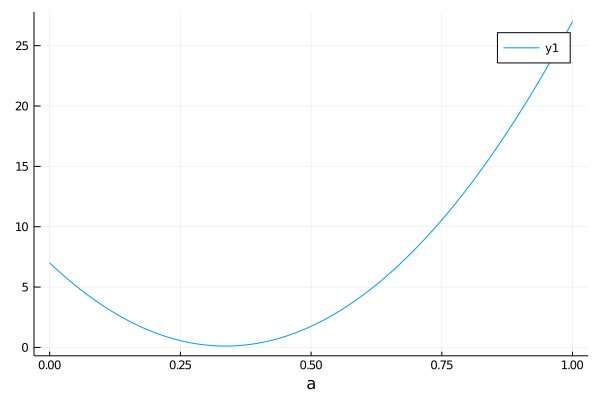

In [4]:
x0 = [1, 2]
d = -f_prime(x0)
n, max = 101, 1
res = max/(n-1)
a0 = 0:res:max
y0 = zeros(n)

println("f(x) along the direction: ", d)
for i in 1:1:n
    y0[i] = f(x0 + a0[i]*d)[1]
    #@printf("%4d %8.3f %8.3f  %6.3f %6.3f\n",i, a0[i], y0[i], (x0+a0[i]*d)[1], (x0+a0[i]*d)[2])
end
plot(a0, y0, xlabel="a")

    

In [5]:
function strong_backtracking(f, ∇, x, d; α=5, β=1e-4, σ=0.1) 
    y0, g0, y_prev, α_prev = f(x)[1], ∇(x)⋅d, NaN, 0
    αlo, αhi = NaN, NaN
    # bracket phase
    while true
        y = f(x + α*d)[1]
        if y > y0 + β*α*g0 || (!isnan(y_prev) && y ≥ y_prev) 
            αlo, αhi = α_prev, α
            break 
        end
                
        g = ∇(x + α*d)⋅d 
        if abs(g) ≤ -σ*g0
            return α 
        elseif g ≥ 0
            αlo, αhi = α, α_prev
            break 
        end
        y_prev, α_prev, α = y, α, 2α 
    end
    
    @printf("The initial interval: %6.3f %6.3f\n", αlo, αhi)

    # zoom phase
    ylo = f(x + αlo*d)[1]
    n = 0
    while n < 10
        α = (αlo + αhi)/2
        y = f(x + α*d)[1]
        @printf("The interval: %6.3f %6.3f\n", αlo, αhi)
        if y > y0 + β*α*g0 || y ≥ ylo #
            @printf("No sufficient decrease: %6.3f %6.3f %6.3f %6.3f\n", α, y, y0, ylo)
            αhi = α 
        else
            g = ∇(x + α*d)⋅d 
            if abs(g) ≤ -σ*g0
                return α
            elseif g*(αhi - αlo) ≥ 0
                αhi = αlo 
            end
            αlo = α 
        end
        n += 1
    end 
end

strong_backtracking(f, f_prime, x0, d)

The initial interval:  0.000  5.000
The interval:  0.000  5.000
No sufficient decrease:  2.500 285.750  7.000  7.000
The interval:  0.000  2.500
No sufficient decrease:  1.250 51.063  7.000  7.000
The interval:  0.000  1.250
The interval:  0.625  0.000


0.3125